In [3]:
ps = {
    2: 1 / 36,
    3: 2 / 36,
    4: 3 / 36,
    5: 4 / 36,
    6: 5 / 36,
    7: 6 / 36,
    8: 5 / 36,
    9: 4 / 36,
    10: 3 / 36,
    11: 2 / 36,
    12: 1 / 36
}
V = 0
for x, p in ps.items():
    V += x * p
print(V)

6.999999999999999


In [4]:
import numpy as np


def sample(dices=2):
    x = 0
    for _ in range(dices):
        x += np.random.choice([1, 2, 3, 4, 5, 6])
    return x

In [5]:
print(sample())
print(sample())
print(sample())

7
8
7


In [6]:
trial = 1000
V, n = 0, 0

for _ in range(trial):
    s = sample()
    n += 1
    V += (s - V) / n
    print(V)

7.0
6.5
7.0
7.5
7.4
7.166666666666667
7.571428571428572
8.0
7.666666666666667
7.5
7.909090909090909
7.5
7.3076923076923075
7.428571428571429
7.466666666666667
7.75
7.705882352941177
7.5
7.421052631578948
7.550000000000001
7.380952380952381
7.272727272727273
7.173913043478262
7.166666666666668
7.080000000000001
7.115384615384617
7.037037037037038
7.0357142857142865
7.03448275862069
6.9333333333333345
7.000000000000001
7.062500000000001
7.121212121212122
7.11764705882353
7.057142857142858
7.1944444444444455
7.135135135135136
7.131578947368422
7.179487179487181
7.275000000000001
7.243902439024391
7.11904761904762
7.046511627906978
6.9318181818181825
6.9333333333333345
6.934782608695653
6.914893617021278
7.020833333333335
7.020408163265308
6.980000000000001
6.980392156862746
6.923076923076924
6.867924528301888
6.851851851851853
6.854545454545455
6.875000000000001
6.877192982456141
6.844827586206898
6.898305084745764
6.966666666666668
6.885245901639346
6.838709677419356
6.841269841269843
6.

In [7]:
from common.gridworld import GridWorld

env = GridWorld()
action = 0
next_state, reward, done = env.step(action)

print(next_state)
print(reward)
print(done)

(1, 0)
0
False


In [8]:
env = GridWorld()
state = env.reset()
state

(2, 0)

In [9]:
from collections import defaultdict


class RandomAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.V = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        self.memory.append((state, action, reward))

    def reset(self):
        self.memory.clear()

    def eval(self):
        G = 0
        for state, action, reward in reversed(self.memory):
            G = self.gamma * G + reward
            self.cnts[state] += 1
            self.V[state] += (G - self.V[state]) / self.cnts[state]


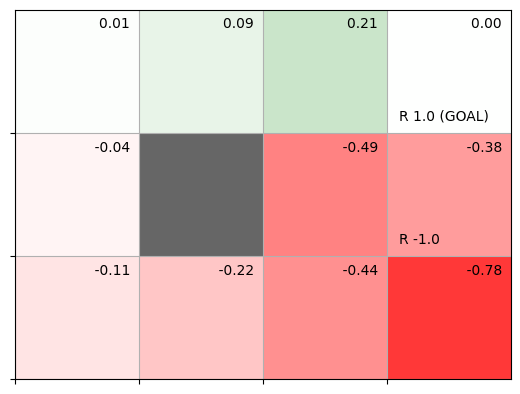

In [10]:
env = GridWorld()
agent = RandomAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.add(state, action, reward)
        if done:
            agent.eval()
            break

        state = next_state

env.render_v(agent.V)

In [11]:
def greedy_probs(Q, state, epsilon=0, action_size=4):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)

    base_prob = epsilon / action_size
    action_probs = {action: base_prob for action in range(action_size)}
    action_probs[max_action] += 1 - epsilon
    return action_probs


class McAgent:
    def __init__(self):
        self.gamma = 0.9
        self.epsilon = 0.1
        self.alpha = 0.1
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        self.memory.append((state, action, reward))

    def reset(self):
        self.memory.clear()

    def update(self):
        G = 0
        for state, action, reward in reversed(self.memory):
            G = self.gamma * G + reward
            key = (state, action)
            self.cnts[key] += 1
            self.Q[key] += (G - self.Q[key]) * self.alpha
            self.pi[state] = greedy_probs(self.Q, state, self.epsilon)

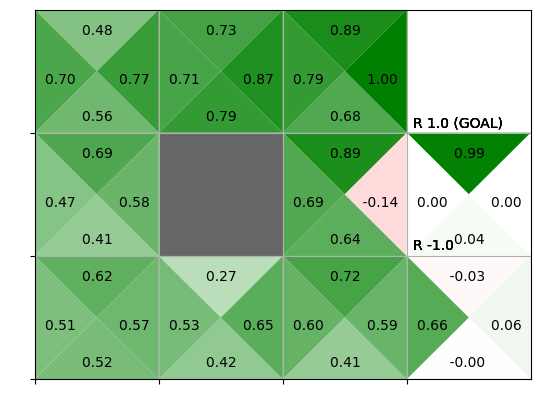

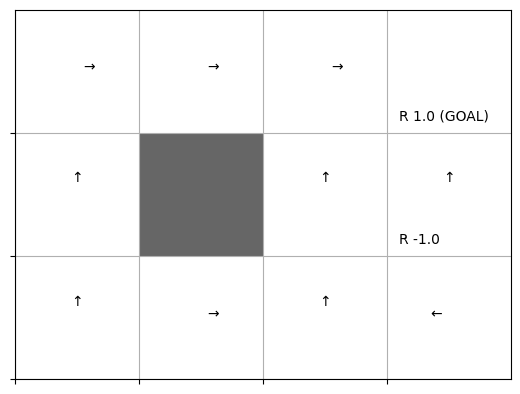

In [12]:
env = GridWorld()
agent = McAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.add(state, action, reward)
        if done:
            agent.update()
            break
        state = next_state
env.render_q(agent.Q)

In [13]:
x = np.array([1, 2, 3])
pi = np.array([0.1, 0.1, 0.8])

e = np.sum(x * pi)
print('E_pi[x]', e)

n = 100
samples = []
for _ in range(n):
    s = np.random.choice(x, p=pi)
    samples.append(s)

mean = np.mean(samples)
var = np.var(samples)
print(f'MC: {mean:.2f} (var:{var:.2f})')

E_pi[x] 2.7
MC: 2.57 (var:0.61)


In [14]:
b = np.array([1 / 3, 1 / 3, 1 / 3])
n = 100
samples = []

for _ in range(n):
    idx = np.arange(len(b))
    i = np.random.choice(idx, p=b)
    s = x[i]
    rho = pi[i] / b[i]
    samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)
print(f'IS: {mean:.2f} (var: {var:.2f})')

IS: 2.73 (var: 10.32)


In [15]:
b = np.array([0.2, 0.2, 0.6])
n = 100
samples = []
for _ in range(n):
    idx = np.arange(len(b))
    i = np.random.choice(idx, p=b)
    s = x[i]
    rho = pi[i] / b[i]
    samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)
print(f'IS: {mean:.2f} (var: {var:.2f})')

IS: 2.61 (var: 2.59)
